In [1]:
from skimage.io import imread, imsave
from skimage.transform import resize as sk_resize
from scipy.misc import imresize as misc_resize
from matplotlib import pyplot as plt
import cv2
img_path = "panda.jpg"
%matplotlib inline
import numpy as np

In [2]:
def show_hist(img):
    plt.hist(img[:, : ,  0].ravel(),256,[0,256])
    plt.show()

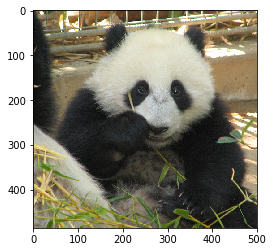

In [3]:
im_arr = imread(img_path)
plt.imshow(im_arr)

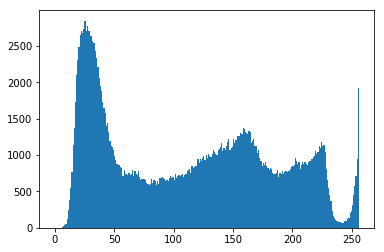

In [4]:
show_hist(im_arr)

In [5]:
%%timeit
# sk_resize_arr = sk_resize(im_arr, (300, 300), preserve_range=True, mode='constant')
sk_resize_arr = sk_resize(im_arr, (300, 300), order=1, mode="constant", preserve_range=True)

9.68 ms ± 437 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
import os, sys
sys.path.append(os.path.abspath("/home/rongjiang/Mask_RCNN"))
from mrcnn import utils

/usr/lib64/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)


In [8]:
%%timeit
sk_resize_arr, _, _, _, _ = utils.resize_image(im_arr, min_dim=300, max_dim=300, min_scale=0, mode="square"
                                              , resize_method="sk")

14.3 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


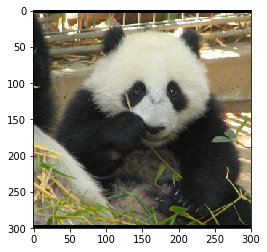

In [16]:
sk_resize_arr, _, _, _, _ = utils.resize_image(im_arr, min_dim=300, max_dim=300, min_scale=0, mode="square"
                                              , resize_method="sk")
plt.imshow(sk_resize_arr)

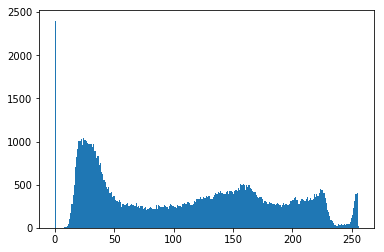

In [17]:
show_hist(sk_resize_arr)

In [13]:
%%timeit
sk_resize_arr, _, _, _, _ = utils.resize_image(im_arr, min_dim=300, max_dim=300, min_scale=0, mode="square"
                                               , resize_method="cv2")

940 µs ± 3.26 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


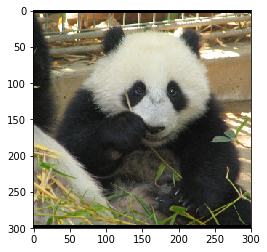

In [14]:
sk_resize_arr, _, _, _, _ = utils.resize_image(im_arr, min_dim=300, max_dim=300, min_scale=0, mode="square"
                                               , resize_method="cv2")
plt.imshow(sk_resize_arr)

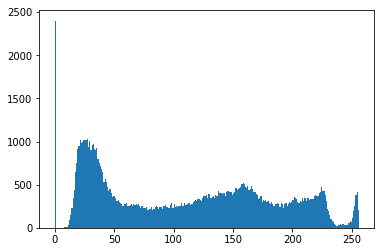

In [15]:
show_hist(sk_resize_arr)

In [51]:
%%timeit
misc_resize_arr = misc_resize(im_arr, (300, 300, 3))

/usr/lib/python3.4/site-packages/ipykernel_launcher.py:257: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


2.52 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


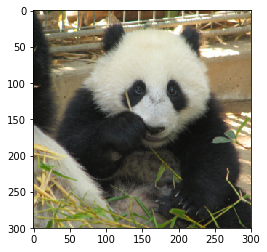

In [52]:
plt.imshow(misc_resize_arr[:, :,])

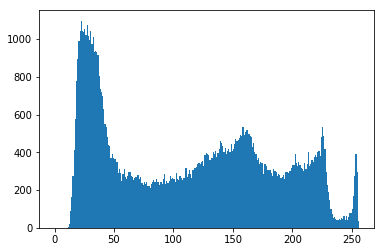

In [38]:
show_hist(misc_resize_arr)

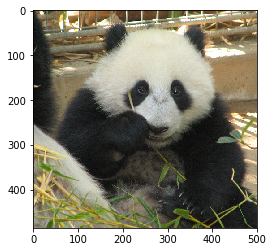

In [39]:
cv2_img = cv2.imread(img_path)
cv2_img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)
plt.imshow(cv2_img)

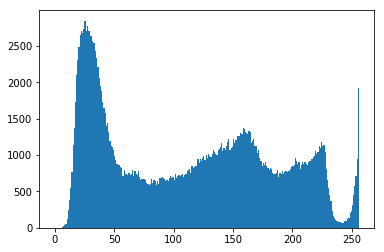

In [40]:
show_hist(cv2_img)

In [ ]:
# .   To shrink an image, it will generally look best with #INTER_AREA interpolation, whereas to
# .   enlarge an image, it will generally look best with c#INTER_CUBIC (slow) or #INTER_LINEAR
# .   (faster but still looks OK).

In [81]:
%%timeit
cv2_resize_arr = cv2.resize(cv2_img, None, fx=300/500, fy=300/500, interpolation=cv2.INTER_LINEAR)

755 µs ± 6.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


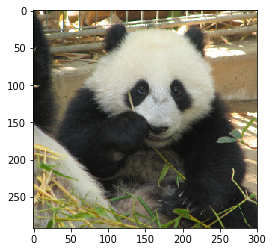

In [54]:
plt.imshow(cv2_resize_arr)

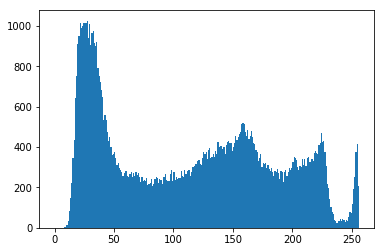

In [46]:
show_hist(cv2_resize_arr)